In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('Untitled Folder/train_digit_recognizer.csv' )
test_df = pd.read_csv('Untitled Folder/test_digit_recognizer.csv')

In [2]:
df = train_df.iloc[0:42000 , 1:]
df.shape

(42000, 784)

In [3]:
target = train_df.iloc[0:42000 , :1]
target.shape

(42000, 1)

In [4]:
#changing from gray scale to binary
df[df > 0] = 1 
test_df[test_df > 0] = 1

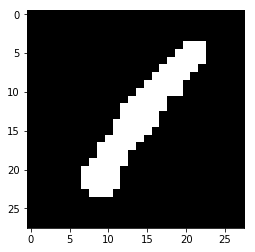

In [5]:
#checking the binary image
image = df.iloc[0].as_matrix()
image = image.reshape((28 , 28))

plt.imshow(image , cmap = 'gray')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split( df, target , train_size = 0.8 , random_state = 0)

C:\Users\Husnain\Downloads\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

#from sklearn.svm import SVC

#clf = SVC(C = 100).fit(X_train , y_train.values.ravel())
#from sklearn.naive_bayes import MultinomialNB

#clf = MultinomialNB().fit(X_train , y_train)
clf.score(X_test , y_test)

0.87226190476190479

In [8]:
y_predict = clf.predict(test_df)

answer_index = test_df.index
answer_index = [ i for i in range(1,28001)]

answer = pd.DataFrame({ 'ImageId' : answer_index , 'label' : y_predict})

In [9]:
answer.head()

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [11]:
answer.to_csv('kaggle_digit2.csv' , encoding = 'utf-8' , index = False)